# DATA 71200: Project 3
### Spring2020 - Lu Tong


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import re
import spacy
nlp = spacy.load("en_core_web_sm")

## Step 1: Load your data, including testing/training split from Project 1.

Data Source: the cleaned version from Project 1

In [3]:
df_train = pd.read_csv('train_clean.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('test_clean.csv', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Test Set Shape = {}'.format(df_test.shape))

Training Set Shape = (7613, 15)
Test Set Shape = (3263, 14)


In [4]:
df_train.head(3)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,rawtext
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,0,4.384615,69,1,1,0,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,7,7,0,0,4.571429,38,1,0,0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,22,20,11,0,5.090909,133,3,0,0,All residents asked to 'shelter in place' are ...


In [5]:
df_train_target = df_train['target']
df_train = df_train.drop(columns=['rawtext','target'])
df_test = df_test.drop(columns=['rawtext'])

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
id                   7613 non-null int16
keyword              7552 non-null object
location             5080 non-null object
text                 7613 non-null object
word_count           7613 non-null int64
unique_word_count    7613 non-null int64
stop_word_count      7613 non-null int64
url_count            7613 non-null int64
mean_word_length     7613 non-null float64
char_count           7613 non-null int64
punctuation_count    7613 non-null int64
hashtag_count        7613 non-null int64
mention_count        7613 non-null int64
dtypes: float64(1), int16(1), int64(8), object(3)
memory usage: 728.7+ KB


In [7]:
df_train.describe()

,id,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,14.903586,14.340733,4.672928,0.620255,6.128494,101.037436,6.839485,0.446999,0.362406
std,3137.116090,5.732604,5.277160,3.559228,0.664104,1.675464,33.781325,4.608758,1.099841,0.720097
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.250000,7.000000,0.000000,0.000000,0.000000
25%,2734.000000,11.000000,11.000000,2.000000,0.000000,4.875000,78.000000,3.000000,0.000000,0.000000
50%,5408.000000,15.000000,14.000000,4.000000,1.000000,5.928571,107.000000,6.000000,0.000000,0.000000
75%,8146.000000,19.000000,18.000000,7.000000,1.000000,7.058824,133.000000,10.000000,0.000000,1.000000
max,10873.000000,31.000000,29.000000,19.000000,4.000000,19.333333,157.000000,61.000000,13.000000,8.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 13 columns):
id                   3263 non-null int16
keyword              3237 non-null object
location             2158 non-null object
text                 3263 non-null object
word_count           3263 non-null int64
unique_word_count    3263 non-null int64
stop_word_count      3263 non-null int64
url_count            3263 non-null int64
mean_word_length     3263 non-null float64
char_count           3263 non-null int64
punctuation_count    3263 non-null int64
hashtag_count        3263 non-null int64
mention_count        3263 non-null int64
dtypes: float64(1), int16(1), int64(8), object(3)
memory usage: 312.4+ KB


In [9]:
df_test.describe()

,id,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,5427.152927,14.965369,14.407294,4.617223,0.631014,6.183041,102.108183,6.950659,0.472878,0.392277
std,3146.427221,5.783576,5.306016,3.509596,0.665277,1.685506,33.972158,4.486544,1.090811,0.758739
min,0.000000,1.000000,1.000000,0.000000,0.000000,2.500000,5.000000,0.000000,0.000000,0.000000
25%,2683.000000,11.000000,11.000000,2.000000,0.000000,4.952381,78.000000,4.000000,0.000000,0.000000
50%,5500.000000,15.000000,15.000000,4.000000,1.000000,6.000000,109.000000,7.000000,0.000000,0.000000
75%,8176.000000,19.000000,18.000000,7.000000,1.000000,7.100000,134.000000,10.000000,0.000000,1.000000
max,10875.000000,31.000000,28.000000,18.000000,4.000000,16.500000,151.000000,55.000000,12.000000,10.000000


In [10]:
#process bothe train and test dataset
df=pd.concat([df_train,df_test])
df.shape

(10876, 13)

I use GloVe for Vectorization. I refered to the notebook on Kaggle to conduct my procedure.

Here is the link to GloVe introduction. https://nlp.stanford.edu/projects/glove/

I use pre-trained word vectors to process text. To be specific, I use Wikipedia 2014 + Gigaword 5 datasets. It is available in 3 varieties :50D ,100D and 200 Dimentional.I try 100 D here.

In [11]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bravo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [12]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [13]:
corpus=create_corpus(df)

100%|██████████| 10876/10876 [00:01<00:00, 8851.53it/s]


In [14]:
embedding_dict={}
with open('glove.6B.100d.txt','rb') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [15]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [16]:
trainpad = tweet_pad[:df_train.shape[0]]
testpad = tweet_pad[df_train.shape[0]:]
tweettrain = pd.DataFrame(data=trainpad, columns=['s' + str(x) for x in range(1,51)])
tweettest = pd.DataFrame(data=testpad, columns=['s' + str(x) for x in range(1,51)])

In [17]:
#merge with base data
train = pd.concat([df_train,tweettrain],axis = 1)
test = pd.concat([df_test,tweettest],axis = 1)

In [18]:
train = train.drop(['id', 'keyword','location','text'], axis=1)
test = test.drop(['id', 'keyword','location','text'], axis=1)

In [19]:
train.head()

,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,s1,...,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50
0,13,13,6,0,4.384615,69,1,1,0,622,...,0,0,0,0,0,0,0,0,0,0
1,7,7,0,0,4.571429,38,1,0,0,96,...,0,0,0,0,0,0,0,0,0,0
2,22,20,11,0,5.090909,133,3,0,0,119,...,0,0,0,0,0,0,0,0,0,0
3,8,8,1,0,7.125000,65,2,1,0,12,...,0,0,0,0,0,0,0,0,0,0
4,16,15,7,0,4.500000,88,2,2,0,134,...,0,0,0,0,0,0,0,0,0,0


## Step 2: PCA for feature selection 
Show how many features do you need to retain to capture 95% of the variance

Evaluate whether this improves your best performing model from Project 2

In [20]:
from sklearn.decomposition import PCA
import mglearn
from sklearn.preprocessing import StandardScaler

In [21]:
#scale the data and test whether performance improve
scaler = StandardScaler()
scaler.fit(train)
X_scaled = scaler.transform(train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Using unscaled data: 14
--------------------Explained variance ratio--------------------
[0.16895572 0.13095528 0.08927954 0.07756922 0.07266618 0.06514189
 0.06351636 0.06239231 0.05659124 0.05081681 0.04512426 0.0374201
 0.02821389 0.02132938]


Text(0, 0.5, 'Principal components')

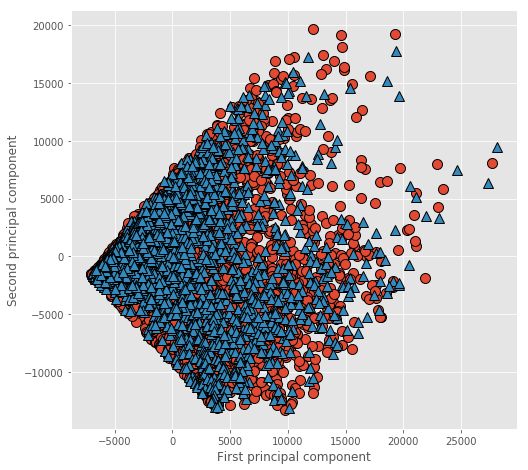

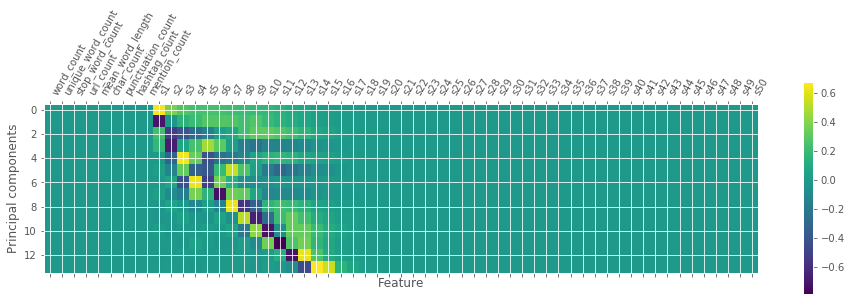

In [30]:
# keep 95%
pca1 = PCA(n_components=0.95)
# fit PCA model to data
pca1.fit(train)

print("Using unscaled data:", len(pca1.explained_variance_ratio_))
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_)

# transform data onto the first two principal components
X_pca1 = pca1.transform(train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(16, 6))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], df_train_target)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.matshow(pca1.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(train.columns)),
           train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Using scaled data: 28
--------------------Explained variance ratio--------------------
[0.12428283 0.08441768 0.07567276 0.05536062 0.05081354 0.04098025
 0.03480981 0.03355074 0.03039812 0.03004364 0.02895991 0.02708464
 0.02535078 0.02471097 0.02398137 0.02302171 0.02277108 0.02240882
 0.02219757 0.02168474 0.02147444 0.02092283 0.02034857 0.01902636
 0.01895356 0.0178472  0.01668142 0.01595513]


Text(0, 0.5, 'Principal components')

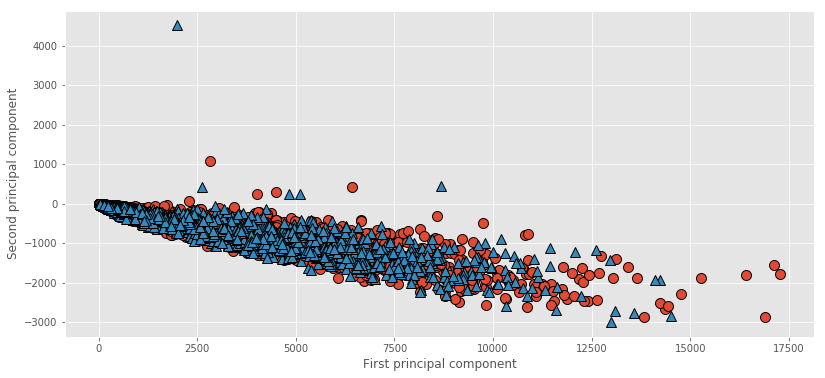

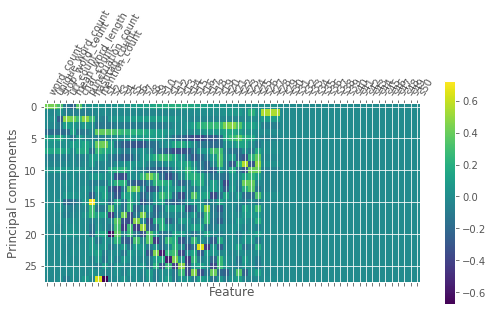

In [32]:
# keep 95%
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_scaled)

print("Using scaled data:", len(pca2.explained_variance_ratio_))
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

# transform data onto the first two principal components
X_pca2 = pca2.transform(train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(16, 6))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], df_train_target)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


plt.matshow(pca2.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(train.columns)),
           train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [35]:
#unscaled data 
X_train,X_test,y_train,y_test=train_test_split(train,df_train_target,test_size=0.15)
print("Shape of Training Datase", X_train.shape)
print("Shape of Validation Dataset", X_test.shape)

Shape of Training Datase (6471, 59)
Shape of Validation Dataset (1142, 59)


In [36]:
#using model and parameters in projector 2
forestbest = RandomForestClassifier(max_depth = 25,min_samples_leaf = 5,min_samples_split = 2, n_estimators = 500)
forestbest.fit(X_train, y_train)
forest_scores = cross_val_score(forestbest, X_train, y_train, cv=10)

print("cv_scores:\n{}".format(forest_scores))
print("cv_scores mean:\n{}".format(np.mean(forest_scores)))
print("Accuracy on test set: {:.3f}".format(forestbest.score(X_test, y_test)))
print(classification_report(y_test, forestbest.predict(X_test),
                            target_names=["1", "0"]))

cv_scores:
[0.72530864 0.72839506 0.72067901 0.73611111 0.71296296 0.70324575
 0.70433437 0.68111455 0.69349845 0.71362229]
cv_scores mean:
0.7119272199179781
Accuracy on test set: 0.682
              precision    recall  f1-score   support

           1       0.68      0.83      0.75       647
           0       0.69      0.49      0.57       495

   micro avg       0.68      0.68      0.68      1142
   macro avg       0.68      0.66      0.66      1142
weighted avg       0.68      0.68      0.67      1142



In [38]:
#unscaled data with pca
train_pca = pca1.transform(train)
X_trainp,X_testp,y_trainp,y_testp=train_test_split(train_pca,df_train_target,test_size=0.15)
print("Shape of Training Datase", X_trainp.shape)
print("Shape of Validation Dataset", X_testp.shape)
#using model and parameters in projector 2
forestbest = RandomForestClassifier(max_depth = 25,min_samples_leaf = 5,min_samples_split = 2, n_estimators = 500)
forestbest.fit(X_trainp, y_trainp)
forest_scores = cross_val_score(forestbest, X_trainp, y_trainp, cv=10)

print("cv_scores:\n{}".format(forest_scores))
print("cv_scores mean:\n{}".format(np.mean(forest_scores)))
print("Accuracy on test set: {:.3f}".format(forestbest.score(X_testp, y_testp)))
print(classification_report(y_test, forestbest.predict(X_testp),
                            target_names=["1", "0"]))

Shape of Training Datase (6471, 14)
Shape of Validation Dataset (1142, 14)
cv_scores:
[0.64660494 0.63523957 0.64605873 0.60123648 0.63214838 0.62287481
 0.64451314 0.60278207 0.60741886 0.66615147]
cv_scores mean:
0.6305028431316427
Accuracy on test set: 0.628
              precision    recall  f1-score   support

           1       0.57      0.77      0.66       647
           0       0.45      0.25      0.32       495

   micro avg       0.54      0.54      0.54      1142
   macro avg       0.51      0.51      0.49      1142
weighted avg       0.52      0.54      0.51      1142



In [39]:
#scaled data
X_trains,X_tests,y_trains,y_tests=train_test_split(X_scaled,df_train_target,test_size=0.15)
print("Shape of Training Datase", X_trains.shape)
print("Shape of Validation Dataset", X_tests.shape)
#using model and parameters in projector 2
forestbest = RandomForestClassifier(max_depth = 25,min_samples_leaf = 5,min_samples_split = 2, n_estimators = 500)
forestbest.fit(X_trains, y_trains)
forest_scores = cross_val_score(forestbest, X_trainp, y_trainp, cv=10)

print("cv_scores:\n{}".format(forest_scores))
print("cv_scores mean:\n{}".format(np.mean(forest_scores)))
print("Accuracy on test set: {:.3f}".format(forestbest.score(X_tests, y_tests)))
print(classification_report(y_test, forestbest.predict(X_tests),
                            target_names=["1", "0"]))

Shape of Training Datase (6471, 59)
Shape of Validation Dataset (1142, 59)
cv_scores:
[0.63425926 0.64142195 0.63678516 0.60432767 0.63060278 0.62905719
 0.62132921 0.61205564 0.60432767 0.6553323 ]
cv_scores mean:
0.6269498826492644
Accuracy on test set: 0.701
              precision    recall  f1-score   support

           1       0.56      0.67      0.61       647
           0       0.43      0.32      0.36       495

   micro avg       0.52      0.52      0.52      1142
   macro avg       0.49      0.49      0.49      1142
weighted avg       0.50      0.52      0.50      1142



In [40]:
#scaled data with pca
X_scaledpca = pca2.transform(X_scaled)
X_trainsp,X_testsp,y_trainsp,y_testsp=train_test_split(X_scaledpca,df_train_target,test_size=0.15)
print("Shape of Training Datase", X_trainsp.shape)
print("Shape of Validation Dataset", X_testsp.shape)
#using model and parameters in projector 2
forestbest = RandomForestClassifier(max_depth = 25,min_samples_leaf = 5,min_samples_split = 2, n_estimators = 500)
forestbest.fit(X_trainsp, y_trainsp)
forest_scores = cross_val_score(forestbest, X_trainsp, y_trainsp, cv=10)

print("cv_scores:\n{}".format(forest_scores))
print("cv_scores mean:\n{}".format(np.mean(forest_scores)))
print("Accuracy on test set: {:.3f}".format(forestbest.score(X_testsp, y_testsp)))
print(classification_report(y_test, forestbest.predict(X_testsp),
                            target_names=["1", "0"]))

Shape of Training Datase (6471, 28)
Shape of Validation Dataset (1142, 28)
cv_scores:
[0.6558642  0.69598765 0.64660494 0.66769706 0.68469861 0.68469861
 0.66924266 0.65378671 0.69195046 0.70588235]
cv_scores mean:
0.6756413255065247
Accuracy on test set: 0.695
              precision    recall  f1-score   support

           1       0.58      0.73      0.65       647
           0       0.48      0.32      0.38       495

   micro avg       0.55      0.55      0.55      1142
   macro avg       0.53      0.53      0.52      1142
weighted avg       0.54      0.55      0.53      1142



Judging from above, the scaling do help improve predicting. However the 0.95 pca doesn't help that much. Probably because the data are not that clearly clusted.

## Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. 
Calculate both ARI and Silhouette Coefficient for all six of the combinations.

-- k-Means (use an elbow visualization to determine the optimal numbers of clusters)

-- Aggolmerate/Hierarchical

-- DBSCAN

### Trial on my own data

In [41]:
from sklearn.cluster import KMeans

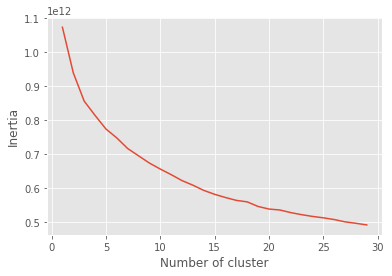

In [42]:
# generate synthetic two-dimensional data on unscaled full data
inertiaVals = {}
for k in range(1, 30):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_        
    
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

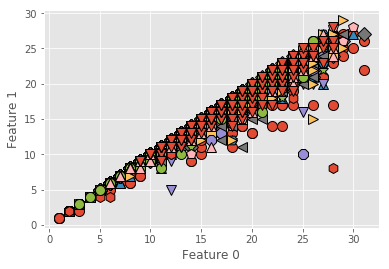

In [44]:
tt = X_train.to_numpy()
kmeans = KMeans(n_clusters=15)
kmeans.fit(tt)
assignments=kmeans.labels_

mglearn.discrete_scatter(tt[:, 0], tt[:, 1], assignments)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

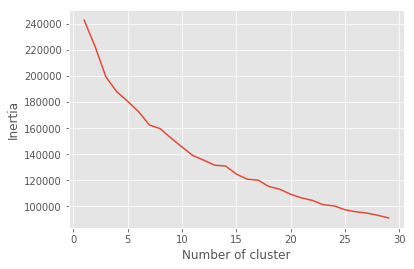

In [43]:
# generate synthetic two-dimensional data on scaled full data
inertiaVals = {}
for k in range(1, 30):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_trains)
    inertiaVals[k] = kmeansTmp.inertia_        
    
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

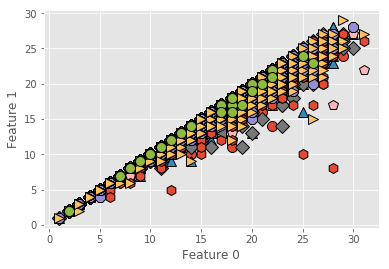

In [46]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(X_trains)
assignments=kmeans.labels_

mglearn.discrete_scatter(tt[:, 0], tt[:, 1], assignments)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Switch to breast_cancer dataset from scikit-learn

since my own data is really stacked together so for the step 3 I decided to switch to the breast_cancer data.

In [48]:
from sklearn.datasets import load_breast_cancer

In [50]:
data = load_breast_cancer()
X_train = data.data
y_train = data.target
feature_names = data.feature_names
df = pd.DataFrame(data=X_train, columns=feature_names)

In [51]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

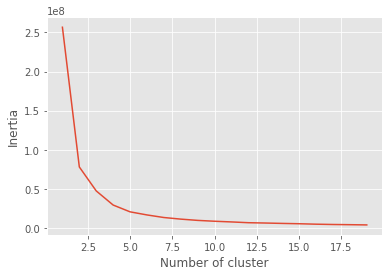

In [53]:
# generate synthetic two-dimensional data
inertiaVals = {}
for k in range(1, 20):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 

plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

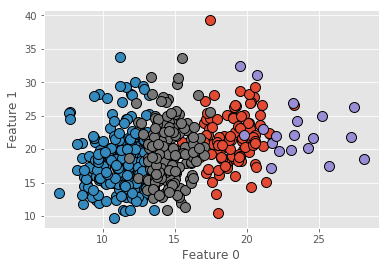

In [54]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], kmeans2.labels_, markers='o')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

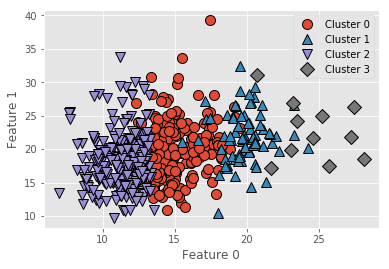

In [55]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)

plt.legend(["Cluster 0", "Cluster 1", "Cluster 2","Cluster 3"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

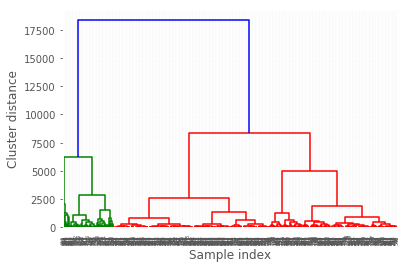

In [56]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

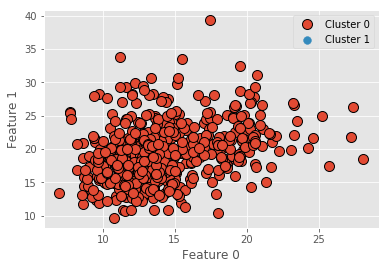

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

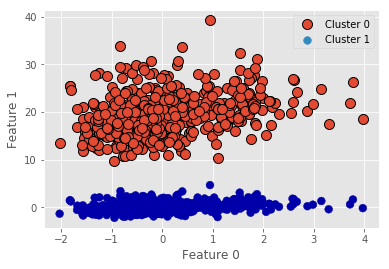

In [58]:
#on scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

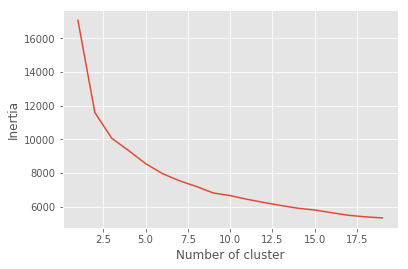

In [59]:
# generate synthetic two-dimensional data
inertiaVals = {}
for k in range(1, 20):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)
    inertiaVals[k] = kmeansTmp.inertia_ 

plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Text(0, 0.5, 'Feature 1')

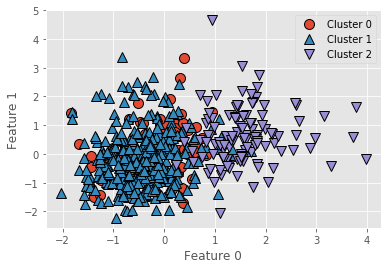

In [62]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_scaled)

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignment)

plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# comparing

## no pca

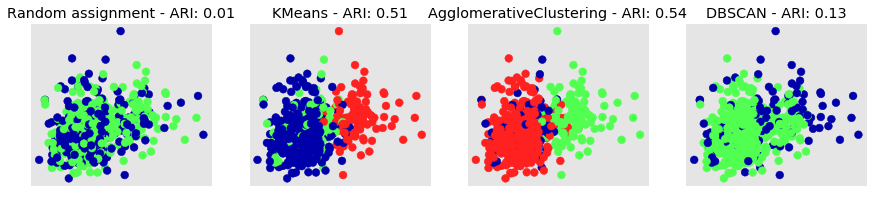

In [93]:
from sklearn.metrics.cluster import adjusted_rand_score
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y_train, clusters)))

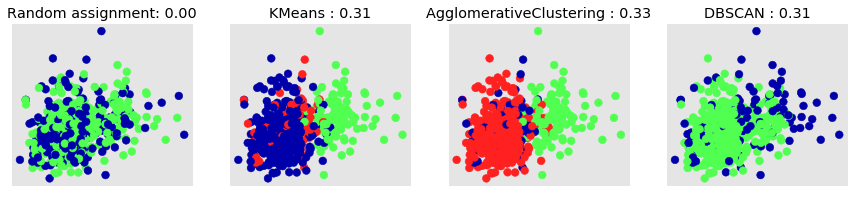

In [92]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

## with pca

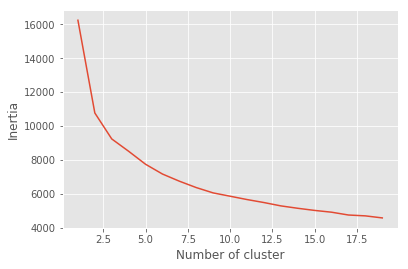

In [86]:
pcab = PCA(n_components=0.95)
# fit PCA model to data
pcab.fit(X_scaled)
X_pca = pcab.transform(X_scaled)
inertiaVals = {}
for k in range(1, 20):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_pca)
    inertiaVals[k] = kmeansTmp.inertia_ 

plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

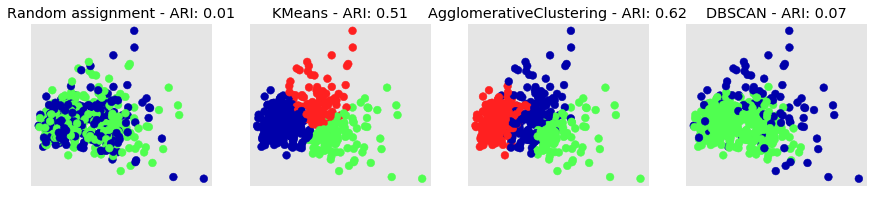

In [91]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca))

# plot random assignment
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_pca)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y_train, clusters)))

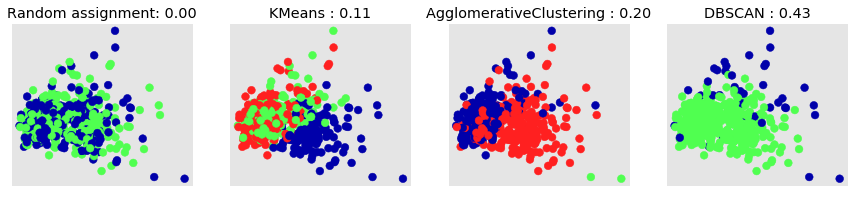

In [90]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_pca)
X_scaled = scaler.transform(X_pca)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca))

# plot random assignment
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN(3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_pca, clusters)))